# Objective

The objective of this analysis is to perform exploratory data analysis (EDA) on the Udemy courses dataset.

## Data Descriptionn

The dataset contains information about Udemy courses like: Distribution of courses across subjects and difficulty levels, comparison of paid vs. free courses, subscriber behavior, popularity trends, most popular and most reviewed courses, popularity of Python-related courses, relationship between price and reviews, and year-wise publishing trends.


In [6]:
import pandas as pd
import seaborn as sns


In [7]:
data = pd.read_csv('udemy_courses.csv', parse_dates=['published_timestamp'])
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


In [8]:
data.dtypes

course_id                            int64
course_title                           str
url                                    str
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                                  str
content_duration                   float64
published_timestamp    datetime64[us, UTC]
subject                                str
dtype: object

In [9]:
data.isnull().sum() # No null values are present

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

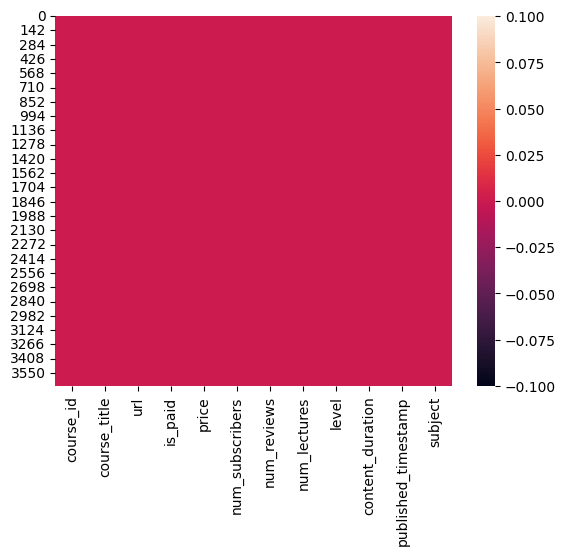

In [10]:
sns.heatmap(data.isnull()) # Visualization of null values

### Duplicate values and Dropping Duplicate Values

In [11]:
dup = data.duplicated().any()
print('Are There any duplicated values?', dup) # Finding duplicate value in dataset

Are There any duplicated values? True


In [12]:
data = data.drop_duplicates()

In [13]:
dup = data.duplicated().any()
print('Are There any duplicated values?', dup) #Removed duplicated values

Are There any duplicated values? False


In [14]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='str')

### Number of Courses Per Subjects

In [15]:
data['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

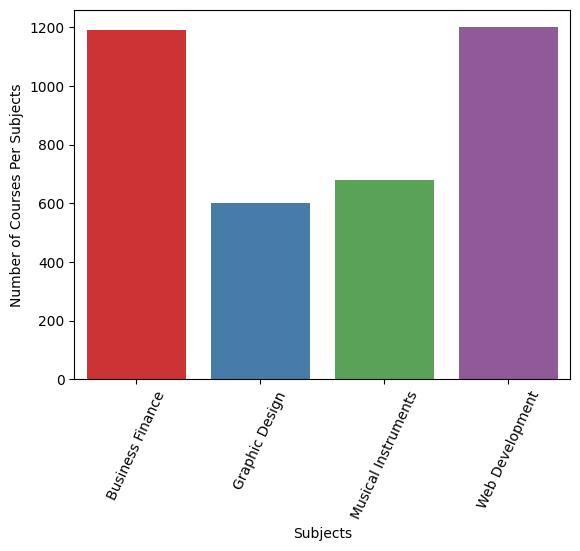

In [17]:
sns.countplot(x='subject', data = data, hue = 'subject', palette='Set1')
plt.ylabel('Number of Courses Per Subjects')
plt.xlabel('Subjects')
plt.xticks(rotation = 65)
plt.show()
# Visualization of Numbers of Courses Per Subject

### Levels for Courses

In [18]:
data['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

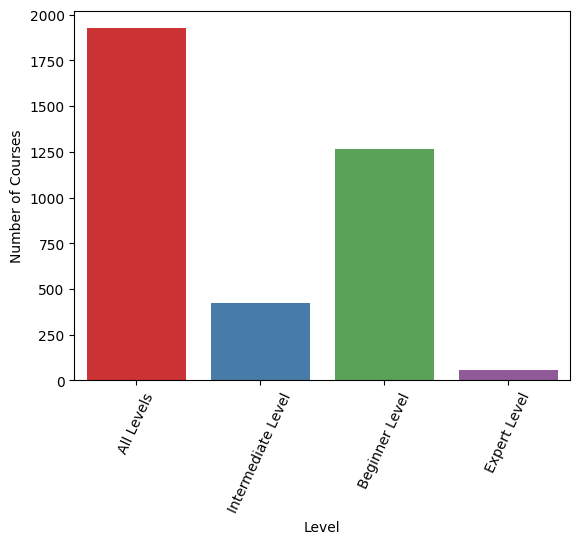

In [19]:
# Data Visualization
sns.countplot(x='level', data = data, hue = 'level', palette='Set1')
plt.ylabel('Number of Courses')
plt.xlabel('Level')
plt.xticks(rotation = 65)
plt.show()

### Number of Paid and Free Courses

In [20]:
data['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

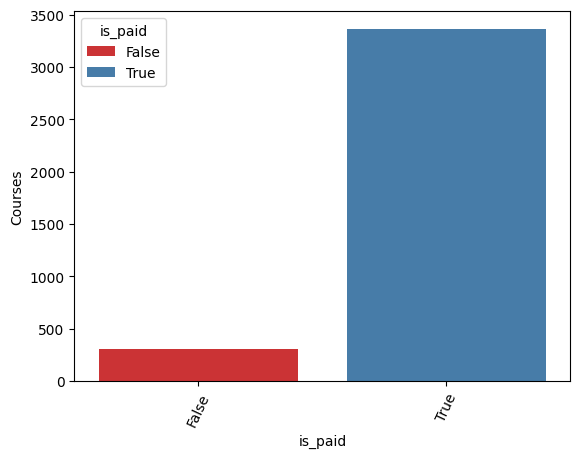

In [21]:
# Data Visualization
sns.countplot(x='is_paid', data = data, hue = 'is_paid', palette='Set1')
plt.ylabel('Courses')
plt.xlabel('is_paid')
plt.xticks(rotation = 65)
plt.show()

### Courses having Higher Number of Lectures

In [22]:
data.groupby(['is_paid']).mean(numeric_only = True) 

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


### Number of Subscribers for Paid and Free Courses

In [23]:
data.groupby('is_paid')['num_subscribers'].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

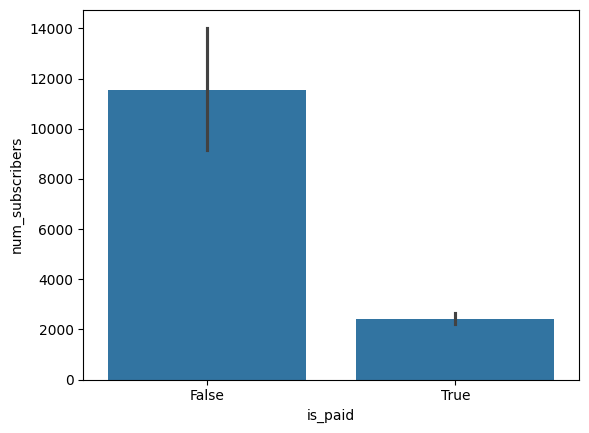

In [24]:
sns.barplot(x = 'is_paid', y = 'num_subscribers', data = data)

### Level having Highest Number of Subscribers

In [25]:
data.groupby('level')['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

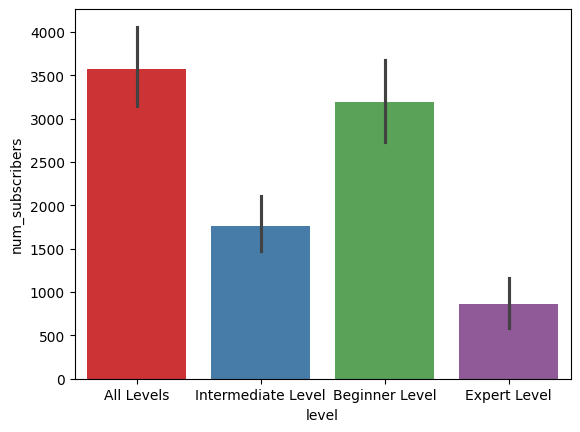

In [26]:
sns.barplot(x = 'level', y = 'num_subscribers', data = data,hue = 'level', palette='Set1') 
plt.show()


### Most Popular Course Title

In [27]:
data[data['num_subscribers'].max() == data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: str

### Top 10 Highest Course Title

In [28]:
top_10 = data.sort_values (by = 'num_subscribers', ascending = False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

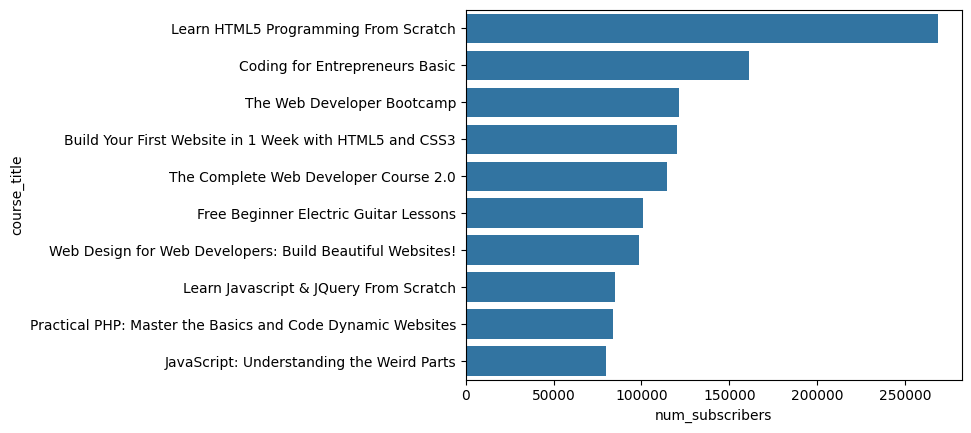

In [29]:
sns.barplot(x ='num_subscribers', y ='course_title', data = top_10)

### Course is having the Highest Number of Reviews

In [30]:
data.sort_values(by ='num_reviews', ascending = False).iloc[0]['course_title']

'The Web Developer Bootcamp'

### Correlation of Price with Reviews

<Axes: xlabel='price', ylabel='num_reviews'>

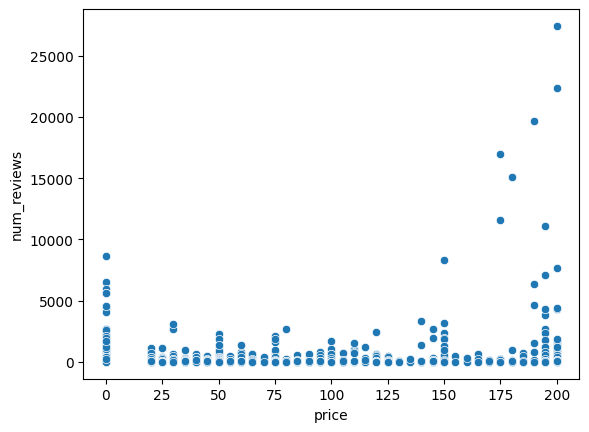

In [31]:
sns.scatterplot( x = 'price', y = 'num_reviews', data = data)

### Total Number of Courses Related to Python and Top 10 Popular Python Courses

In [32]:
len(data[data['course_title'].str.contains('Python', case = False)]) #Total numbers of Courses related to Python

29

In [33]:
python = data[data['course_title'].str.contains('Python', case = False)].\
sort_values(by = 'num_subscribers', ascending = False).head(10)

In [34]:
python

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


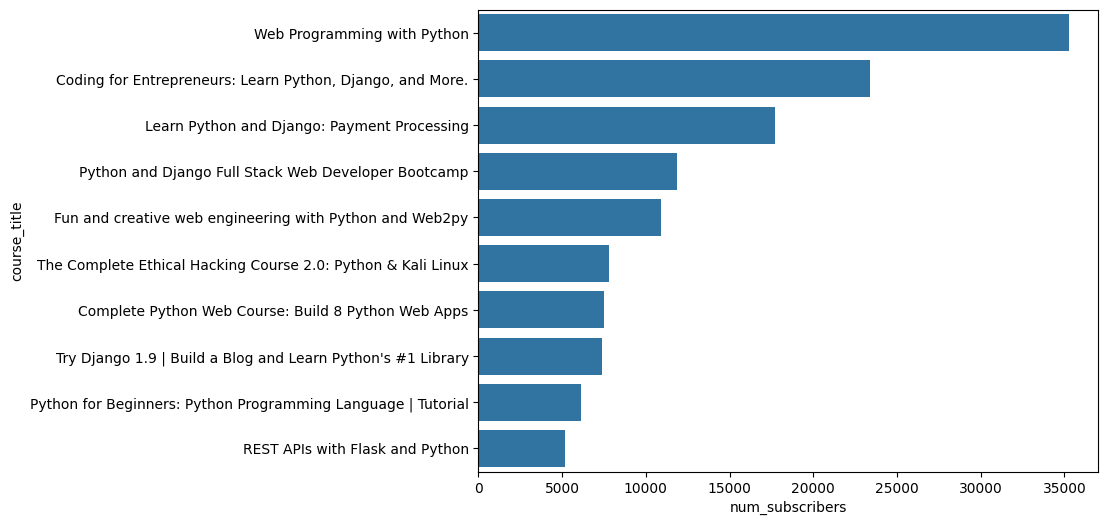

In [35]:
# Data Visulization
plt.figure(figsize = (8, 6))
sns.barplot( x='num_subscribers', y = 'course_title' , data = python)
plt.show()

### Year in Which Highest Number of Courses Posted

In [36]:
data['Year'] = data['published_timestamp'].dt.year

In [37]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


<Axes: xlabel='Year', ylabel='count'>

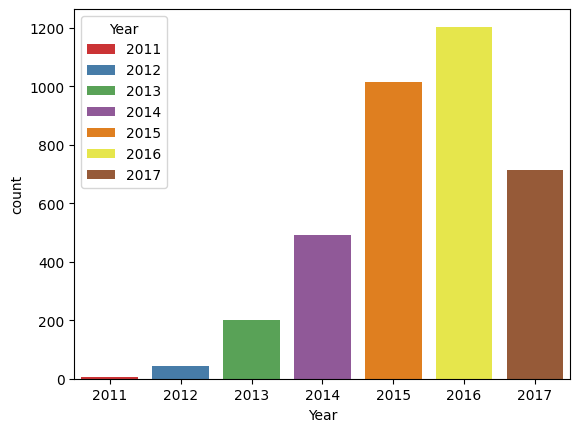

In [38]:
sns.countplot( x = 'Year', data = data, hue = 'Year', palette = 'Set1') 

In [39]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'Year'],
      dtype='str')

###  Category-Wise Count of Posted Subjects (year wise)

In [41]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Musical Instruments     10
      Graphic Design          10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64

# Conclusion

- The dataset was clean with no missing values, and duplicate rows were removed before analysis.

- In 2017, the highest number of courses was posted.

- The number of reviews is showing a positive trend with the price of courses

- Expert level has fewer subscribers than all other levels (Beginner level, intermediate level, etc.)

- The number of subscribers for free courses is significantly higher than for paid courses.
